In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn

# 그래디언트부스팅트리

In [2]:
data = pd.read_csv("dataset/backorder_addcol.csv")

In [3]:
data = data.drop(['Unnamed: 0'], axis=1)

In [4]:
X = np.array(data.drop(['went_on_backorder', 'sku'], axis=1))
y = np.array(data['went_on_backorder'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) # random_state는 그냥 무작위로 나눠

In [7]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [8]:
print("train 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("test 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

train 정확도: 0.989
test 정확도: 0.989


## 사전 가지치기

In [9]:
# 과대 적합 방지를 위한 사전 가지치기
gbrt = GradientBoostingClassifier(random_state=0, max_depth=5)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, random_state=0)

In [10]:
print("train 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("test 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

train 정확도: 0.990
test 정확도: 0.988


## 학습률 낮추기
- 학습률이 크면 트리를 보정을 강하게 하기 때문에 복잡한 모델이 됨
- n_estimators값을 키우면 앙상블에 트리가 더많이 추가되기 때문에 복잡도가 커짐

In [11]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate = 0.1)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [12]:
print("train 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("test 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

train 정확도: 0.989
test 정확도: 0.989


## 특성 중요도 시각화

In [13]:
data1 = data.drop(['went_on_backorder', 'sku'], axis=1)

In [14]:
data1.columns

Index(['national_inv', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'lead_time',
       'forcast_1_month', 'forcast_sales_12_month',
       'forcast_perf_1_month_avg'],
      dtype='object')

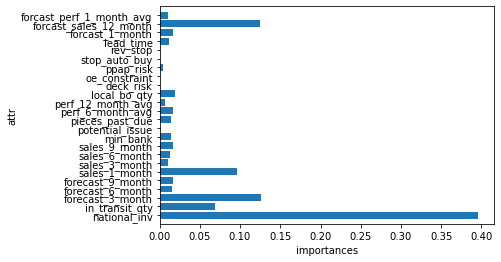

<Figure size 1800x1440 with 0 Axes>

In [15]:
def func(model):
    n_features = data1.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data1.columns)
    plt.xlabel("importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)
    plt.figure(figsize=(25,20))
plt.show()

func(gbrt)

- 그래디언트 부스팅 트리의 특성 중요도 그래프는 랜덤포레스트 특성 중요도와 비슷
- 다만 그래디언트 부스팅은 일부 특성을 완전히 무시함
- 비슷한 종류의 데이터에서 그래디언트 부스팅과 랜덤 포레스트 둘 다 작용
- 보통 더 안정적인 랜덤포레스트 우선 적용

- 장점
    - 그래디언트 부스팅 결정 트리는 지도 학습에서 가장 강력하고 널리 사용
    - 특성의 스케일 조정 필요 없고, 연석적인 특성에서도 잘 동작
- 단점
    - 매개변수 조정을 잘 해야 하고, 훈련 시간이 김
    - 트리기반 특성상 고차원 데이터에는 잘 작동하지 않음
- 매개변수
> - n_estimators가 클수록 모델이 복잡해지고 과대적합이 될 가능성이 높음
> - learning_rate를 낮추면 비슷한 복잡도의 모델을 만들기 위해 더 많은 트리 추가 필요
 > - n_estimators를 맞추고 나서 적절한 learning_rate를 찾는것이 좋음
 > - max_depth는 5보다 깊어지지 않게 하기

# 그래디언트 부스팅 회귀

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

In [17]:
gbr = GradientBoostingRegressor()

In [18]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [20]:
print(gbr.score(X_train, y_train))
print(gbr.score(X_test, y_test))

0.14393546949021085
0.12540283591292212


In [21]:
y_predict = gbr.predict(X_test)

In [22]:
print(y_predict[0])

0.0022707856549566666


In [23]:
print("train 정확도: {:.3f}".format(gbr.score(X_train, y_train)))
print("test 정확도: {:.3f}".format(gbr.score(X_test, y_test)))

train 정확도: 0.144
test 정확도: 0.125


# 랜덤 포레스트 앙상블
출처: https://ssoondata.tistory.com/14

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

- n_estimator : 만들 트리 개수
- max_features : 사용할 특성의 수
- n_job : 사용할 코어 수 지정 가능(=-1로 지정하면 모든 코어 사용) 모델 만들 때 시간이 오래 걸리는 경우
- random_state : 지정한 값에 따라 전혀 다른 트리가 만들어져 같은 결과를 만들어야 하면 고정해야함
- max_depth: 최대 나무 깊이
- max_leaf_nodes: 말단 노드 최대 개수
- min_sample_leaf: 노드를 분할하기 위한 최소한 샘플 데이터 수(과적합 제어에 사용)
- min_samples_split: 말단 노드가 되기위한 최소한 샘플 수(과적합 제어 용도. 비대칭적 데이터의 경우 특정 클래스 데이터가 극도로 작을 수 있어 이런 경우에는 작게 설정)
- 출처: https://velog.io/@lsmmay322/%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%ACDecision-Tree

In [26]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            n_estimators=5, n_jobs=None, random_state=0)

RandomForestClassifier(n_estimators=5, random_state=0)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)  # 100개 트리
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.988


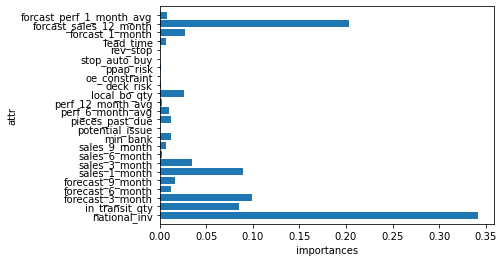

<Figure size 1800x1440 with 0 Axes>

In [29]:
def func(model):
    n_features = data1.shape[1]
    plt.barh(range(n_features), gbr.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data1.columns)
    plt.xlabel("importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)
    plt.figure(figsize=(25,20))
plt.show()

func(forest)

- 장점
> - 성능이 뛰어나고 매개변수 튜닝 없이도 잘 작동
> - 데이터의 스케일 맞추지 않아도 되고, 매우 큰 데이터셋에서도 잘 작동
- 단점
> - 특성의 일부만 사용해서 결정 트리보다 더 깊어질 수 있음
> - 수백개의 트리를 자세히 분석하기가 어려움 (간소하게 의사결정과정을 표현해야 하는 경우는 단일 트리로)
> - 차원이 매우 높고 희소한 데이터에서는 잘 작동하지 않음 (이럴경우 선형모델 적합하기)
> - 많은 메모리를 사용하고 훈련과 예측 시 오래걸림 (속도와 메모리에 제약이 있는 경우 선형 모델 적합)
- 높은 성능을 내기 때문에 대부분의 경우에 사용함